In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
laptops = pd.read_csv('laptops.csv',encoding='Latin-1')

In [3]:
laptops.head(3)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"


In [4]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


In [5]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

we see that our columns are in camel case instead of snake case.
In the next cell, we will define a function to clean up the column names and also use a for loop to iterate through each column


In [6]:
def clean_col(col):
    col = col.strip()
    col = col.replace('Operating System','OS')
    col = col.replace(')','')
    col = col.replace('(','')
    col = col.lower()
    col = col.replace(' ','_')
    return col

In [7]:
new_columns = []
for column in laptops.columns:
    clean_c = clean_col(column)
    new_columns.append(clean_c)
    
laptops.columns = new_columns

In [8]:
laptops.columns

Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight',
       'price_euros'],
      dtype='object')

In [9]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufacturer  1303 non-null   object
 1   model_name    1303 non-null   object
 2   category      1303 non-null   object
 3   screen_size   1303 non-null   object
 4   screen        1303 non-null   object
 5   cpu           1303 non-null   object
 6   ram           1303 non-null   object
 7   storage       1303 non-null   object
 8   gpu           1303 non-null   object
 9   os            1303 non-null   object
 10  os_version    1133 non-null   object
 11  weight        1303 non-null   object
 12  price_euros   1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


The cells above is showing us that the columns labels are all object type, which is not supposed to be.
In the next cells we will look at the screen_size,weight and gpu to have a clear understanding.

In [10]:
laptops['screen_size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [11]:
laptops['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [12]:
laptops['weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In other do perform some statistical analysis on this column labels,we need to clean them by removing the character attached to them, converting them to integer or float datatype as the case maybe and also renaming the column to retain some information about them

In [13]:
laptops['screen_size'] = laptops['screen_size'].str.replace('"','').astype(float)

In [14]:
#Renaming the screen size column to show that the screen size was measured in inches

laptops.rename({'screen_size':'screensize_inches'},axis=1,inplace=True)

In [15]:
laptops['ram'] = laptops['ram'].str.replace('GB','').astype(int)

In [16]:
#Renaming the ram column to show that the rams were in gigabyte

laptops.rename({'ram':'ram_gb'},axis=1,inplace=True)

In [17]:
laptops['weight'] = laptops['weight'].str.replace('kgs','').str.replace('kg','').astype(float)

In [18]:
#Renaming the weight to show that the weight of the laptops were in kg
laptops.rename({'weight':'weight_kg'},axis=1,inplace=True)

In [19]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer       1303 non-null   object 
 1   model_name         1303 non-null   object 
 2   category           1303 non-null   object 
 3   screensize_inches  1303 non-null   float64
 4   screen             1303 non-null   object 
 5   cpu                1303 non-null   object 
 6   ram_gb             1303 non-null   int64  
 7   storage            1303 non-null   object 
 8   gpu                1303 non-null   object 
 9   os                 1303 non-null   object 
 10  os_version         1133 non-null   object 
 11  weight_kg          1303 non-null   float64
 12  price_euros        1303 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [20]:
laptops.describe(include='all')

,manufacturer,model_name,category,screensize_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros
count,1303,1303,1303,1303.000000,1303,1303,1303.000000,1303,1303,1303,1133,1303.000000,1303
unique,19,618,6,NaN,40,118,NaN,38,110,7,4,NaN,791
top,Lenovo,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,NaN,256GB SSD,Intel HD Graphics 620,Windows,10,NaN,"1799,00"
freq,297,30,727,NaN,507,190,NaN,412,281,1125,1072,NaN,14
mean,NaN,NaN,NaN,15.017191,NaN,NaN,8.382195,NaN,NaN,NaN,NaN,2.038734,NaN
std,NaN,NaN,NaN,1.426304,NaN,NaN,5.084665,NaN,NaN,NaN,NaN,0.665475,NaN
min,NaN,NaN,NaN,10.100000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,0.690000,NaN
25%,NaN,NaN,NaN,14.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1.500000,NaN
50%,NaN,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,2.040000,NaN
75%,NaN,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,2.300000,NaN


In [21]:
laptops.head()

,manufacturer,model_name,category,screensize_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,"898,94"
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,"575,00"
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,"2537,45"
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,"1803,60"


In [22]:
laptops['cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core i5 2.0GHz             1
Intel Core M m3 1.2GHz           1
Intel Core M m3-7Y30 2.2GHz      1
Intel Core i5 7200U 2.7GHz       1
AMD E-Series 9000e 1.5GHz        1
Name: cpu, Length: 118, dtype: int64

In [23]:
#Creating a new column for cpu manufacturer.
laptops['cpu_manufacturer'] = laptops['cpu'].str.split().str[0]

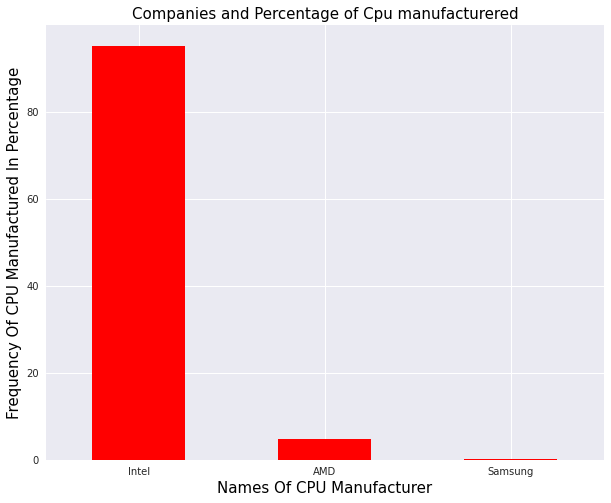

In [24]:
cpu_manufacturer= laptops['cpu_manufacturer'].value_counts(normalize=True)*100
cpu_manufacturer.plot(kind='bar',rot=0,color='r',figsize=(10,8));
plt.xlabel('Names Of CPU Manufacturer',color='black',fontsize=15);
plt.ylabel('Frequency Of CPU Manufactured In Percentage',color='black',fontsize=15);
plt.title('Companies and Percentage of Cpu manufacturered',color='black',fontsize=15);           

Intel are the highest manufacturer of cpu taking 95% of the dataset

In [25]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer       1303 non-null   object 
 1   model_name         1303 non-null   object 
 2   category           1303 non-null   object 
 3   screensize_inches  1303 non-null   float64
 4   screen             1303 non-null   object 
 5   cpu                1303 non-null   object 
 6   ram_gb             1303 non-null   int64  
 7   storage            1303 non-null   object 
 8   gpu                1303 non-null   object 
 9   os                 1303 non-null   object 
 10  os_version         1133 non-null   object 
 11  weight_kg          1303 non-null   float64
 12  price_euros        1303 non-null   object 
 13  cpu_manufacturer   1303 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 142.6+ KB


In [26]:
laptops['os'].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

In [27]:
laptops['os'].value_counts(normalize=True,dropna=False)*100

Windows      86.339217
No OS         5.065234
Linux         4.758250
Chrome OS     2.072141
macOS         0.997698
Mac OS        0.613968
Android       0.153492
Name: os, dtype: float64

we can see that most of the laptops are using the windows operating system.
We an os named No Os which might have been that there was no information for the os at the time of filling the information.
Also, we can mac os appearing twice.

Let's take a look at the os version to see if there is any relationship between them

In [28]:
laptops['os_version'].value_counts(normalize=True,dropna=False)*100

10      82.271681
NaN     13.046815
7        3.453569
10 S     0.613968
X        0.613968
Name: os_version, dtype: float64

In [29]:
laptops.loc[laptops['os']=='No OS','os_version']='Version Unknown'

In [30]:
laptops['os_version'].value_counts(normalize=True,dropna=False)*100

10                 82.271681
NaN                 7.981581
Version Unknown     5.065234
7                   3.453569
10 S                0.613968
X                   0.613968
Name: os_version, dtype: float64

In [31]:
no_os_version=laptops.loc[laptops['os_version'].isnull(),'os'].value_counts(normalize=True)*100

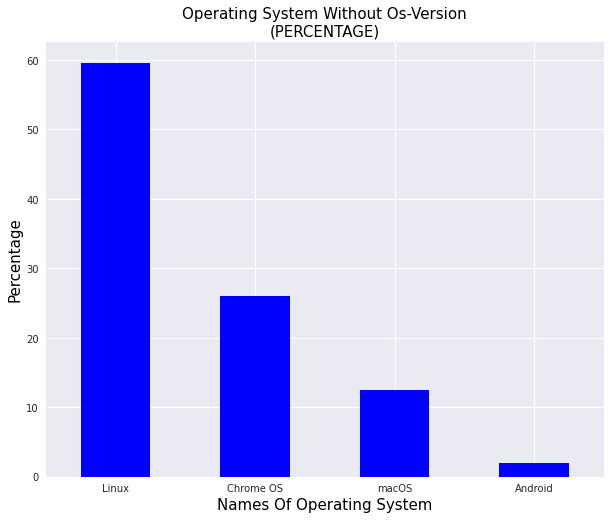

In [32]:
no_os_version.plot(kind='bar',color='blue',rot=0,figsize=(10,8));
plt.xlabel('Names Of Operating System',color='black',fontsize=15);
plt.ylabel('Percentage',color='black',fontsize=15)
plt.title('Operating System Without Os-Version\n(PERCENTAGE)',color='black',fontsize=15);

Linux is the highest OS in our dataset without any OS version, taking 60%

In [33]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer       1303 non-null   object 
 1   model_name         1303 non-null   object 
 2   category           1303 non-null   object 
 3   screensize_inches  1303 non-null   float64
 4   screen             1303 non-null   object 
 5   cpu                1303 non-null   object 
 6   ram_gb             1303 non-null   int64  
 7   storage            1303 non-null   object 
 8   gpu                1303 non-null   object 
 9   os                 1303 non-null   object 
 10  os_version         1199 non-null   object 
 11  weight_kg          1303 non-null   float64
 12  price_euros        1303 non-null   object 
 13  cpu_manufacturer   1303 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 142.6+ KB


The price of the laptops are of the type object dtype.
In the next cell we will convert in to a float datatype

In [34]:
laptops.price_euros.unique()

array(['1339,69', '898,94', '575,00', '2537,45', '1803,60', '400,00',
       '2139,97', '1158,70', '1495,00', '770,00', '393,90', '344,99',
       '2439,97', '498,90', '1262,40', '1518,55', '745,00', '2858,00',
       '499,00', '979,00', '191,90', '999,00', '258,00', '819,00',
       '659,00', '418,64', '1099,00', '800,00', '1298,00', '896,00',
       '244,99', '199,00', '439,00', '1869,00', '998,00', '249,00',
       '367,00', '488,69', '879,00', '389,00', '1499,00', '522,99',
       '682,00', '1419,00', '369,00', '1299,00', '639,00', '466,00',
       '319,00', '841,00', '398,49', '1103,00', '384,00', '767,80',
       '586,19', '2449,00', '415,00', '599,00', '941,00', '690,00',
       '1983,00', '438,69', '229,00', '549,00', '949,00', '1089,00',
       '955,00', '870,00', '1095,00', '519,00', '855,00', '530,00',
       '977,00', '1096,16', '1510,00', '860,00', '399,00', '395,00',
       '1349,00', '699,00', '598,99', '1449,00', '1649,00', '689,00',
       '1197,00', '1195,00', '1049,0

In [35]:
laptops['price_euros'] = laptops['price_euros'].str.replace(',','.').astype(float)
laptops['price_euros'].dtype

dtype('float64')

In [36]:
laptops.head()

,manufacturer,model_name,category,screensize_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,cpu_manufacturer
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,Version Unknown,1.86,575.00,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,2537.45,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1803.60,Intel


In [37]:
manufacturer_count=laptops['manufacturer'].value_counts(normalize=True)*100

In [38]:
manufacturer_count

Lenovo       22.793553
Dell         22.793553
HP           21.028396
Asus         12.125863
Acer          7.904835
MSI           4.144282
Toshiba       3.683807
Apple         1.611665
Samsung       0.690714
Mediacom      0.537222
Razer         0.537222
Microsoft     0.460476
Vero          0.306984
Xiaomi        0.306984
Fujitsu       0.230238
LG            0.230238
Chuwi         0.230238
Google        0.230238
Huawei        0.153492
Name: manufacturer, dtype: float64

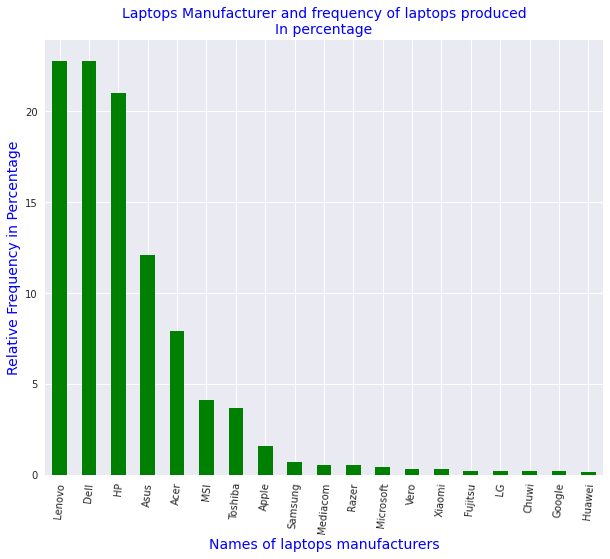

In [39]:
manufacturer_count.plot(kind='bar',color='g',rot=85,figsize=(10,8));
plt.ylabel('Relative Frequency in Percentage',color='b',fontsize=14);
plt.xlabel('Names of laptops manufacturers',color='b',fontsize=14);
plt.title('Laptops Manufacturer and frequency of laptops produced\nIn percentage',color='b',fontsize=14);

Lenovo,Dell and Hp are the highest manufacturer of laptops taking more than 60% of the total laptops manufactured

In [40]:
manufacturer_mean_price=laptops.groupby(['manufacturer']).price_euros.mean().sort_index(ascending=True)

In [41]:
manufacturer_mean_price

manufacturer
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: price_euros, dtype: float64

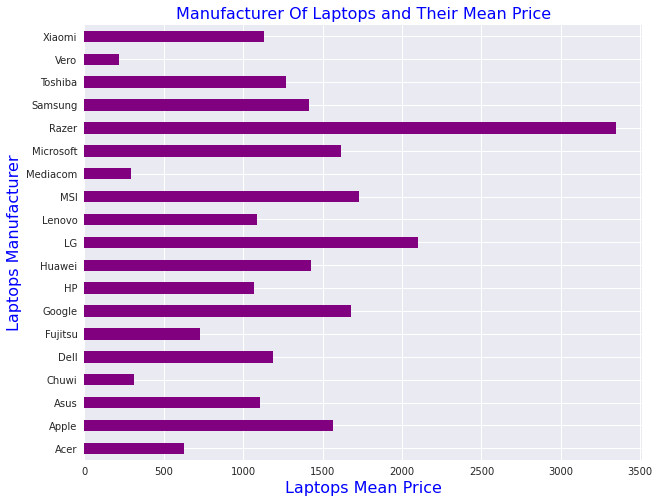

In [42]:
manufacturer_mean_price.plot(kind='barh',color='purple',figsize=(10,8));
plt.xlabel('Laptops Mean Price', color='b',fontsize=16);
plt.ylabel('Laptops Manufacturer',color='b',fontsize=16);
plt.title('Manufacturer Of Laptops and Their Mean Price',color='b',fontsize=16);

From the plot above Razer laptops are more costlier with a mean price of over 3000 euros
Vero,madiacom and chuwi all cost below 500 euros.

In [43]:
laptops.loc[laptops['manufacturer']=='Xiaomi']

,manufacturer,model_name,category,screensize_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,cpu_manufacturer
184,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,Version Unknown,1.95,1199.00,Intel
192,Xiaomi,Mi Notebook,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,Version Unknown,1.30,999.90,Intel
514,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD,Nvidia GeForce MX150,No OS,Version Unknown,1.95,1399.95,Intel
877,Xiaomi,Mi Notebook,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows,10,1.28,935.00,Intel


Looking at the laptops manufactured by Xiaomi we can find some interesting things.

we can replace the os_version from unknown version to 10 and the os to windows because the laptops are all similar.

In [44]:
laptops.loc[laptops['manufacturer']=='Xiaomi','os']='Windows'

In [45]:
laptops.loc[laptops['manufacturer']=='Xiaomi','os_version']='10'

In [46]:
laptops.os.unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

In [47]:
laptops.groupby(['manufacturer']).os.value_counts(normalize=True,dropna=False)*100

manufacturer  os       
Acer          Windows       73.786408
              Linux         15.533981
              Chrome OS     10.679612
Apple         macOS         61.904762
              Mac OS        38.095238
Asus          Windows       89.240506
              Linux          6.329114
              No OS          2.531646
              Chrome OS      1.898734
Chuwi         Windows      100.000000
Dell          Windows       87.542088
              Linux         12.121212
              Chrome OS      0.336700
Fujitsu       Windows      100.000000
Google        Chrome OS    100.000000
HP            Windows       94.160584
              No OS          4.379562
              Chrome OS      1.459854
Huawei        Windows      100.000000
LG            Windows      100.000000
Lenovo        Windows       82.491582
              No OS         15.824916
              Chrome OS      1.010101
              Android        0.673401
MSI           Windows      100.000000
Mediacom      Windows     

In [48]:
category_weight=laptops.groupby(['category']).weight_kg.mean().round(2).sort_index(ascending=True)

In [49]:
category_weight

category
2 in 1 Convertible    1.55
Gaming                2.95
Netbook               1.31
Notebook              2.06
Ultrabook             1.34
Workstation           2.47
Name: weight_kg, dtype: float64

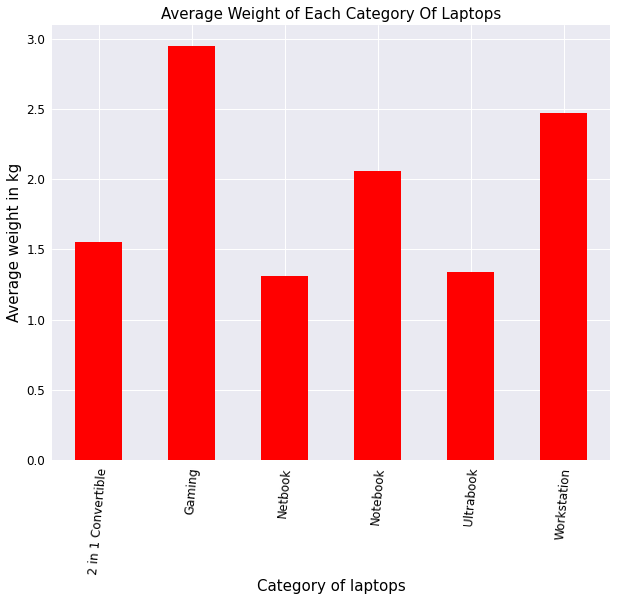

In [50]:
category_weight.plot(kind='bar',color='red',rot=85,figsize=(10,8));
plt.xticks(fontsize=12,color='black');
plt.yticks(fontsize=12,color='black');
plt.ylabel('Average weight in kg',color='black',fontsize=15);
plt.xlabel('Category of laptops',color='black',fontsize=15);
plt.title('Average Weight of Each Category Of Laptops',color='black',fontsize=15);

Laptops in Gaming,Notebook and Workstation category weigh more than the rest.


In [51]:
category_price=laptops.groupby(['category']).price_euros.mean().round(2)

In [52]:
category_price

category
2 in 1 Convertible    1282.40
Gaming                1731.38
Netbook                636.23
Notebook               782.08
Ultrabook             1548.23
Workstation           2280.36
Name: price_euros, dtype: float64

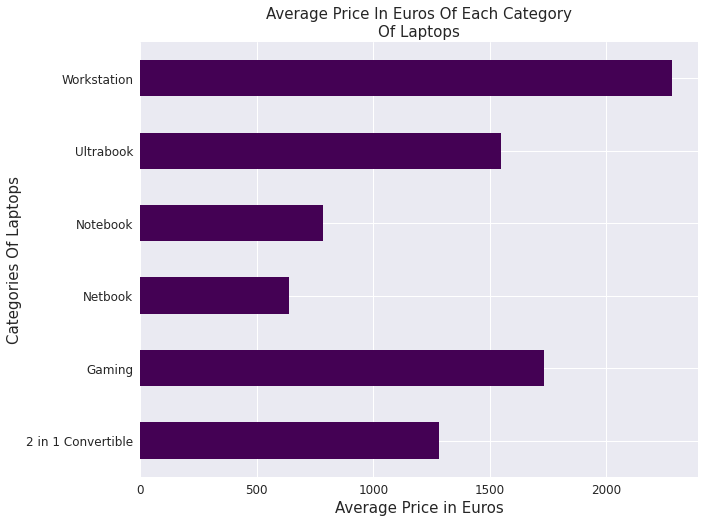

In [53]:
category_price.plot(kind='barh',cmap='viridis',figsize=(10,8));
plt.ylabel('Categories Of Laptops',fontsize=15);
plt.xlabel('Average Price in Euros',fontsize=15);
plt.title('Average Price In Euros Of Each Category\nOf Laptops',fontsize=15);
plt.grid(True)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

Laptops in the workstation category cost more in price than other categories.

In [54]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer       1303 non-null   object 
 1   model_name         1303 non-null   object 
 2   category           1303 non-null   object 
 3   screensize_inches  1303 non-null   float64
 4   screen             1303 non-null   object 
 5   cpu                1303 non-null   object 
 6   ram_gb             1303 non-null   int64  
 7   storage            1303 non-null   object 
 8   gpu                1303 non-null   object 
 9   os                 1303 non-null   object 
 10  os_version         1199 non-null   object 
 11  weight_kg          1303 non-null   float64
 12  price_euros        1303 non-null   float64
 13  cpu_manufacturer   1303 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 142.6+ KB


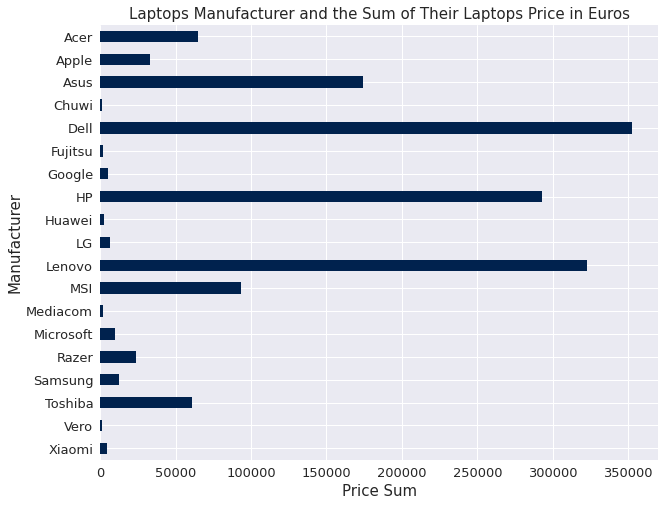

In [55]:
laptops.groupby('manufacturer').price_euros.sum().sort_index(ascending=False).round(2).plot(kind='barh',cmap='cividis',figsize=(10,8));
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);
plt.ylabel('Manufacturer',fontsize=15);
plt.xlabel('Price Sum',fontsize=15);
plt.title('Laptops Manufacturer and the Sum of Their Laptops Price in Euros',fontsize=15);

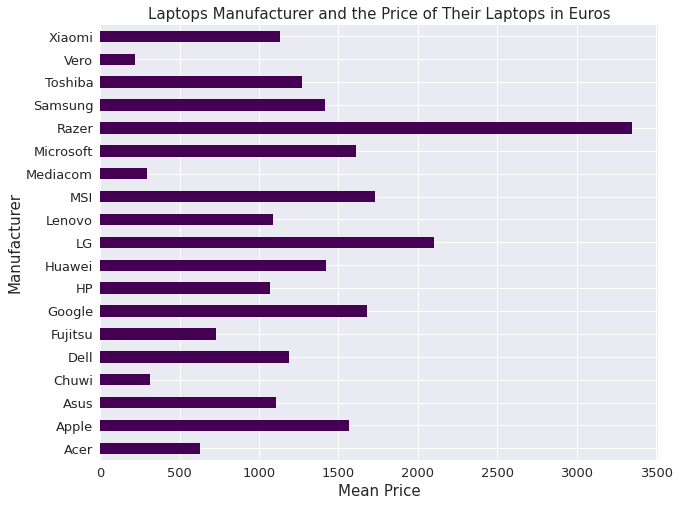

In [59]:
manufacturer_price=laptops.groupby('manufacturer')['price_euros'].mean().round(1)
manufacturer_price.plot(kind='barh',cmap='viridis',figsize=(10,8));           
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);
plt.ylabel('Manufacturer',fontsize=15);
plt.xlabel('Mean Price',fontsize=15);
plt.title('Laptops Manufacturer and the Price of Their Laptops in Euros',fontsize=15);

In [57]:
import seaborn as sns

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/seaborn/categorical.py:1635: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


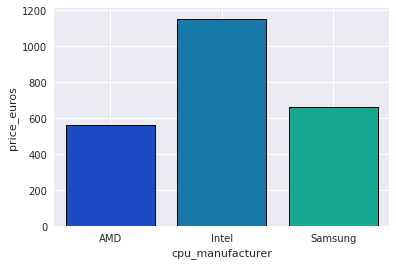

In [58]:
cpu_price=laptops.groupby('cpu_manufacturer')['price_euros'].mean().reset_index()
sns.barplot(cpu_price['cpu_manufacturer'],cpu_price['price_euros'],palette ='winter',
           linewidth=1,
            edgecolor='k'*cpu_price['cpu_manufacturer'].nunique()
           );
plt.grid(True)